# Time-series: Air passengers

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset
data = pd.read_csv("/Users/ohajati/Desktop/Airpassengers/AirPassengers.csv")

# Convert the 'Month' column to datetime format
data['Month'] = pd.to_datetime(data['Month'])

# Set 'Month' column as the index
data.set_index('Month', inplace=True)

data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


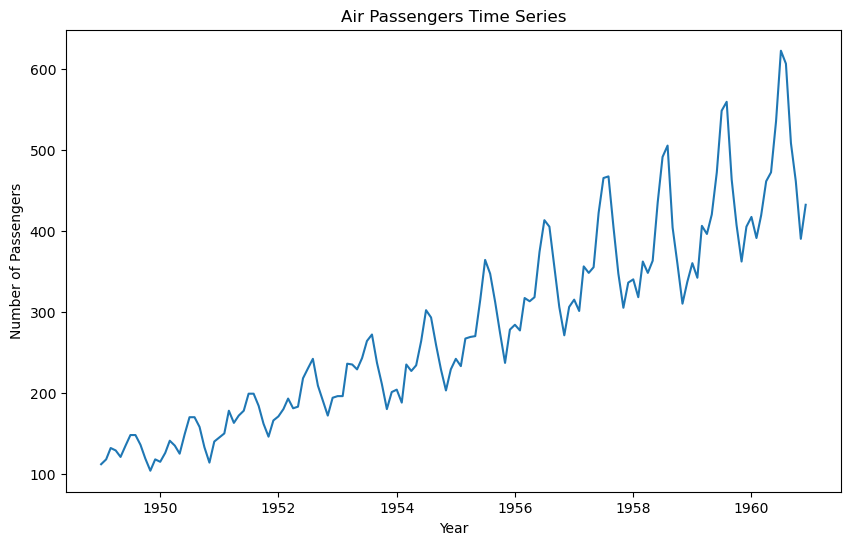

In [17]:
# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.title('Air Passengers Time Series')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.show()

In [18]:
# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Split the data into train and test sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [19]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 12  # Number of time steps to look back
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [20]:
model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 0.1163
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1006
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0872
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0739
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0616
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0486
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0358
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0237
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0136
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0119
Epoch 12/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 13/100
4/4 [==============================] - 0s 2ms/st

1/1 [==============================] - 0s 7ms/step


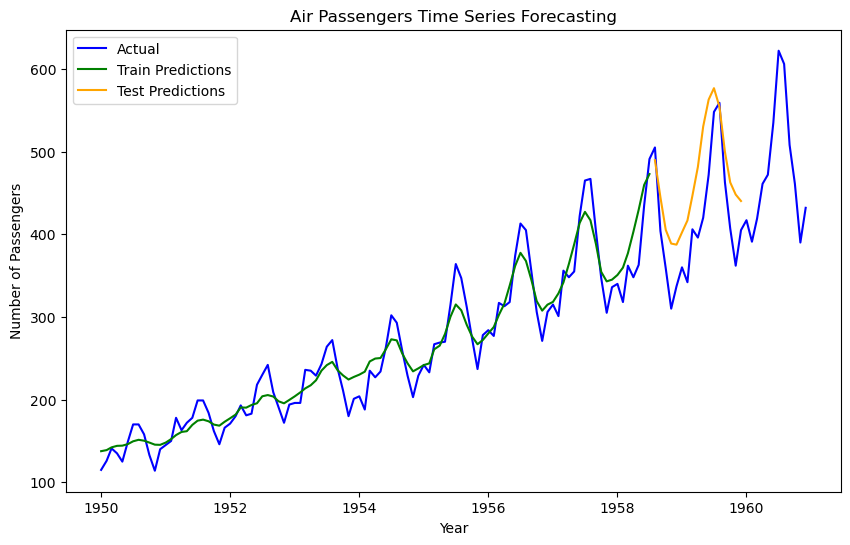

In [21]:
# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform the predictions
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

# Plot predictions
plt.figure(figsize=(10, 6))

# Plot actual data
plt.plot(data.index[seq_length:], data['#Passengers'][seq_length:], label='Actual', color='blue')

# Plot training predictions
plt.plot(data.index[seq_length:seq_length+len(train_predictions)], train_predictions, label='Train Predictions',color='green')

# Plot testing predictions
test_pred_index = range(seq_length+len(train_predictions), seq_length+len(train_predictions)+len(test_predictions))
plt.plot(data.index[test_pred_index], test_predictions, label='Test Predictions',color='orange')

plt.title('Air Passengers Time Series Forecasting')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

1/1 [==============================] - 0s 8ms/step


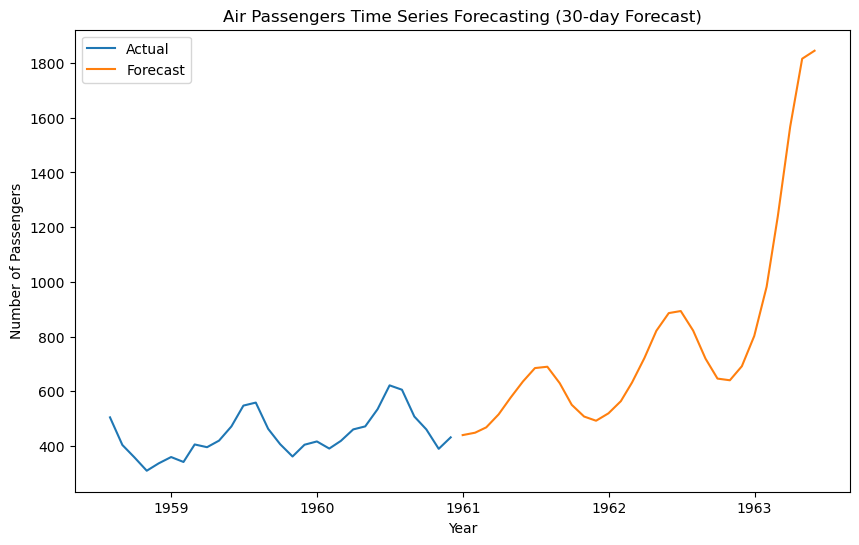

In [22]:
forecast_period = 30
forecast = []

# Use the last sequence from the test data to make predictions
last_sequence = X_test[-1]

for _ in range(forecast_period):
    # Reshape the sequence to match the input shape of the model
    current_sequence = last_sequence.reshape(1, seq_length, 1)
    # Predict the next value
    next_prediction = model.predict(current_sequence)[0][0]
    # Append the prediction to the forecast list
    forecast.append(next_prediction)
    # Update the last sequence by removing the first element and appending the predicted value
    last_sequence = np.append(last_sequence[1:], next_prediction)

# Inverse transform the forecasted values
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(data.index[-len(test_data):], scaler.inverse_transform(test_data), label='Actual')
plt.plot(pd.date_range(start=data.index[-1], periods=forecast_period, freq='ME'), forecast, label='Forecast')
plt.title('Air Passengers Time Series Forecasting (30-day Forecast)')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()